In [3]:
import zipfile
with zipfile.ZipFile("ChoquetClass.zip", "r") as zip_ref:
    zip_ref.extractall("ChoquetClass")


In [4]:
#importamos la librería
import ChoquetClass as cc
import pandas as pd
from ChoquetClass import classifier

#cargamos nuestros datos y reescribimos los nombres de los atributos
df=pd.read_csv("iris.dat")
df.columns = ["atributo1", "atributo2", "atributo3", "atributo4", "Class"]

# divide el dataset en training(70%) y test (30%),
# Nos devuelve los valores mínimos y máximos de cada atributo
# Pide al usuario especificar la columna de la clase
train_Data, test_Data, class_column, Values  = cc.analyse.preparacion(df)




Columnas disponibles en el DataFrame:
['atributo1', 'atributo2', 'atributo3', 'atributo4', 'Class']

📝 Ingresa el nombre de la columna objetivo (clase): Class

📊 DATA DE ENTRENAMIENTO (primeras filas):
     atributo1  atributo2  atributo3  atributo4            Class
88         5.5        2.5        4.0        1.3  Iris-versicolor
25         5.0        3.4        1.6        0.4      Iris-setosa
138        6.9        3.1        5.4        2.1   Iris-virginica
29         4.8        3.1        1.6        0.2      Iris-setosa
19         5.4        3.4        1.7        0.2      Iris-setosa

✅ Valores Mínimos y Máximos por atributo (sin incluir la clase):
atributo1: min=4.3, max=7.9
atributo2: min=2.0, max=4.2
atributo3: min=1.1, max=6.9
atributo4: min=0.1, max=2.5


In [7]:

#creación de los conjuntos fuzzy para cada uno de los atributos

C_1_T1=cc.conjuntos_fuzzy.TriangleFuzzySet(4.3 , 4.3, 5.5, term= "BAJO" )
C_2_T1=cc.conjuntos_fuzzy.TriangleFuzzySet(4.3,5.5,6.7,term="MEDIO")
C_3_T1=cc.conjuntos_fuzzy.TriangleFuzzySet(5.5,6.7,7.9,term="CASI ALTO")
C_4_T1=cc.conjuntos_fuzzy.TriangleFuzzySet(6.7,7.9,7.9,term="ALTO")
L1=cc.variables_linguisticas.LinguisticVariable([C_1_T1,C_2_T1,C_3_T1,C_4_T1],concept="atributo1",universe_of_discourse=[4.3,7.9])

C_1_T2=cc.conjuntos_fuzzy.TriangleFuzzySet(2.0 ,2.0,3.1 , term= "BAJO" )
C_2_T2=cc.conjuntos_fuzzy.GaussianFuzzySet(3.1,0.4,term="MEDIO")
C_3_T2=cc.conjuntos_fuzzy.TriangleFuzzySet(3.1,4.2,4.2,term="ALTO")
L2=cc.variables_linguisticas.LinguisticVariable([C_1_T2,C_2_T2,C_3_T2],concept="atributo2",universe_of_discourse=[2,4.2])

C_1_T3=cc.conjuntos_fuzzy.TriangleFuzzySet(1.1 ,1.1 ,4 , term= "BAJO" )
C_2_T3=cc.conjuntos_fuzzy.TrapezoidFuzzySet(1.1,3.03,4.96,6.9,term="MEDIO")
C_3_T3=cc.conjuntos_fuzzy.TriangleFuzzySet(4,6.9,6.9,term="ALTO")
L3=cc.variables_linguisticas.LinguisticVariable([C_1_T3,C_2_T3,C_3_T3],concept="atributo3",universe_of_discourse=[1.1,6.9])

C_1_T4=cc.conjuntos_fuzzy.TriangleFuzzySet(0.1 ,0.1 ,1.3 , term= "BAJO" )
C_2_T4=cc.conjuntos_fuzzy.TriangleFuzzySet(0.1,1.3,2.5,term="MEDIO")
C_3_T4=cc.conjuntos_fuzzy.TriangleFuzzySet(1.3,2.5,2.5,term="ALTO")
L4=cc.variables_linguisticas.LinguisticVariable([C_1_T4,C_2_T4,C_3_T4],concept="atributo4",universe_of_discourse=[0.1,2.5])

#Unir variables linguisticas
variables = cc.var_linguistic_predef.joinVar.join(L1, L2, L3, L4)


# Crear reglas con sintaxis tipo lenguaje
R1  = cc.rules_generator.IF("atributo1").IS("BAJO").AND("atributo2").IS("ALTO").AND("atributo3").IS("BAJO").AND("atributo4").IS("BAJO").THEN("Iris-setosa")
R2  = cc.rules_generator.IF("atributo1").IS("BAJO").AND("atributo2").IS("MEDIO").AND("atributo3").IS("BAJO").AND("atributo4").IS("BAJO").THEN("Iris-setosa")
R3  = cc.rules_generator.IF("atributo1").IS("MEDIO").AND("atributo2").IS("MEDIO").AND("atributo3").IS("MEDIO").AND("atributo4").IS("MEDIO").THEN("Iris-versicolor")
R4  = cc.rules_generator.IF("atributo1").IS("ALTO").AND("atributo2").IS("MEDIO").AND("atributo3").IS("ALTO").AND("atributo4").IS("MEDIO").THEN("Iris-virginica")
R5  = cc.rules_generator.IF("atributo1").IS("MEDIO").AND("atributo2").IS("ALTO").AND("atributo3").IS("BAJO").AND("atributo4").IS("BAJO").THEN("Iris-setosa")
R6  = cc.rules_generator.IF("atributo1").IS("ALTO").AND("atributo2").IS("MEDIO").AND("atributo3").IS("ALTO").AND("atributo4").IS("ALTO").THEN("Iris-virginica")
R7  = cc.rules_generator.IF("atributo1").IS("MEDIO").AND("atributo2").IS("MEDIO").AND("atributo3").IS("ALTO").AND("atributo4").IS("MEDIO").THEN("Iris-versicolor")
R8  = cc.rules_generator.IF("atributo1").IS("ALTO").AND("atributo2").IS("BAJO").AND("atributo3").IS("ALTO").AND("atributo4").IS("ALTO").THEN("Iris-virginica")
R9  = cc.rules_generator.IF("atributo1").IS("BAJO").AND("atributo2").IS("ALTO").AND("atributo3").IS("BAJO").AND("atributo4").IS("MEDIO").THEN("Iris-setosa")
R10 = cc.rules_generator.IF("atributo1").IS("MEDIO").AND("atributo2").IS("BAJO").AND("atributo3").IS("MEDIO").AND("atributo4").IS("MEDIO").THEN("Iris-versicolor")
R11 = cc.rules_generator.IF("atributo1").IS("ALTO").AND("atributo2").IS("BAJO").AND("atributo3").IS("ALTO").AND("atributo4").IS("MEDIO").THEN("Iris-virginica")
R12 = cc.rules_generator.IF("atributo1").IS("MEDIO").AND("atributo2").IS("ALTO").AND("atributo3").IS("MEDIO").AND("atributo4").IS("BAJO").THEN("Iris-versicolor")
R13 = cc.rules_generator.IF("atributo1").IS("BAJO").AND("atributo2").IS("ALTO").AND("atributo3").IS("BAJO").AND("atributo4").IS("BAJO").THEN("Iris-setosa")
R14 = cc.rules_generator.IF("atributo1").IS("ALTO").AND("atributo2").IS("MEDIO").AND("atributo3").IS("ALTO").AND("atributo4").IS("ALTO").THEN("Iris-virginica")
R15 = cc.rules_generator.IF("atributo1").IS("MEDIO").AND("atributo2").IS("BAJO").AND("atributo3").IS("MEDIO").AND("atributo4").IS("MEDIO").THEN("Iris-versicolor")


# Crear base y mostrar reglas
base = cc.rules_generator.RuleBase()
base.add_rules([R1, R2, R3, R4, R5,R6, R7, R8, R9, R10,R11, R12, R13, R14, R15])




#Clasificación usando Choquet Integral
clf = classifier.Classifier(variables,base.rules, train_Data, class_column, q_vector=[1,1,1])


# Un patrón de prueba
patron = test_Data.iloc[3]

clase_predicha, resultado = clf.classify_Choquet(patron)
print("Clase predicha:", clase_predicha)


Clase predicha: Iris-versicolor


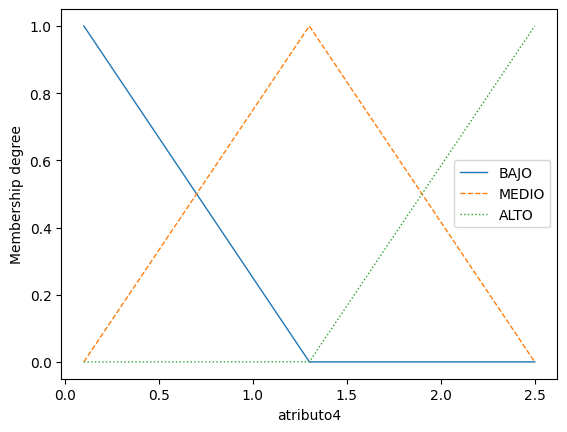

In [8]:
variables['atributo4'].plot()